In [1]:
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore")
import preprocessor as process
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import spacy
from sklearn import svm
import tweepy
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
#importing libraries

In [2]:
df = pd.read_csv("Tweets.csv", encoding = 'unicode_escape')
#reading in data

In [3]:
df.rename({"is_there_an_emotion_directed_at_a_brand_or_product": "Emotion",
          "tweet_text": "Text"}, axis = 1, inplace = True)
#renaming columns

In [4]:
df.drop("emotion_in_tweet_is_directed_at", axis = 1, inplace = True)
#getting rid of irrelevant columns 

In [5]:
df

,Text,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [6]:
df.Emotion.value_counts()
#checkign value counts for each class

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

In [7]:
df = df[df["Emotion"] != "I can't tell"]
#getting rid of the I cant tell class

In [8]:
df

,Text,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [9]:
df.Text.iloc[90]

'Thanks to @mention for publishing the news of our new medical Apps in the #sxswi conf. blog {link} #sxsw #sxswh #mhealth'

In [10]:
clean = []
for i in range(len(df)):
    cleaned = process.clean(str(df.Text.iloc[i]))
    clean.append(cleaned)
df["Cleaned_Tweet"] = clean
#first stage of cleaning using the preprocessor library 
#creating new column called cleaned_tweet

In [11]:
df

,Text,Emotion,Cleaned_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,". I have a G iPhone. After hrs tweeting at , i..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,Can not wait for also. They should sale them d...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"great stuff on Fri : Marissa Mayer (Google), T..."
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,Ipad everywhere. {link}
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"Wave, buzz... RT We interrupt your regularly s..."
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"Google's Zeiger, a physician never reported po..."
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,Some Verizon iPhone customers complained their...


In [12]:
df.dropna(axis = 0, inplace = True)
#dropping na values from the df

In [13]:
df.isna().sum()
#no na values

Text             0
Emotion          0
Cleaned_Tweet    0
dtype: int64

In [14]:
new = []
for tweet in df.Cleaned_Tweet:
    x = re.finditer(r"([A-Za-z])([A-Za-z])+", tweet)
    new.append((' '.join([x1.group() for x1 in x])).lower())
df.Cleaned_Tweet = new
#using regular expressions library to further simplify the tweet

In [15]:
df

,Text,Emotion,Cleaned_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,have iphone after hrs tweeting at it was dead ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipad iphone app that you ll...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,hope this year festival isn as crashy as this ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri marissa mayer google tim re...
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,ipad everywhere link
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,wave buzz rt we interrupt your regularly sched...
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,some verizon iphone customers complained their...


In [16]:
stop_words = stopwords.words("english")
stop_words.append("rt")
#getting rid of stopwords

In [17]:
df.Cleaned_Tweet = df.Cleaned_Tweet.apply(lambda x:" ".join([item for item in x.split() if item not in stop_words]))
#getting rid of stopped words

In [18]:
df.drop("Text", axis = 1, inplace = True)
#dropping the text column

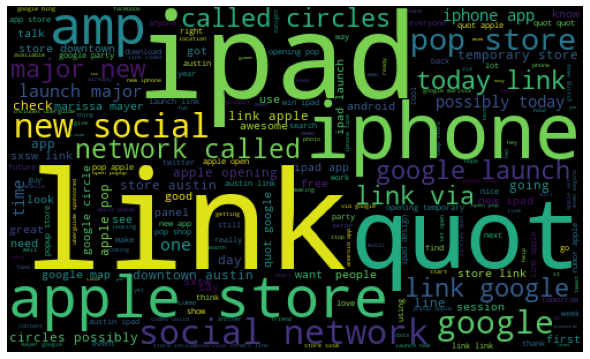

In [19]:
words = ' '.join([txt for txt in df.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
#most common words thus far

In [20]:
new_words = ["link", "quot"]
df.Cleaned_Tweet = df.Cleaned_Tweet.apply(lambda x:" ".join([item for item in x.split() if item not in new_words]))
#getting rid of other "twitter" words like link and quot

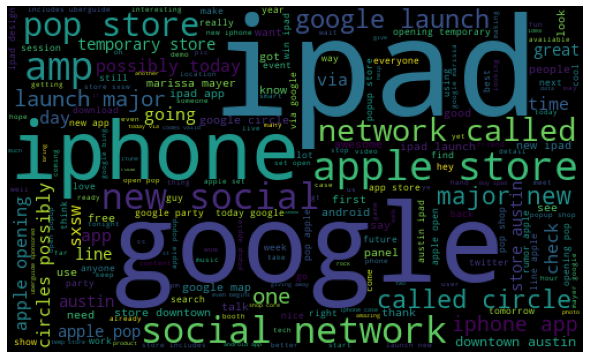

In [21]:
words = ' '.join([txt for txt in df.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
#updated image of most popular words

# Word Map for negative tweets

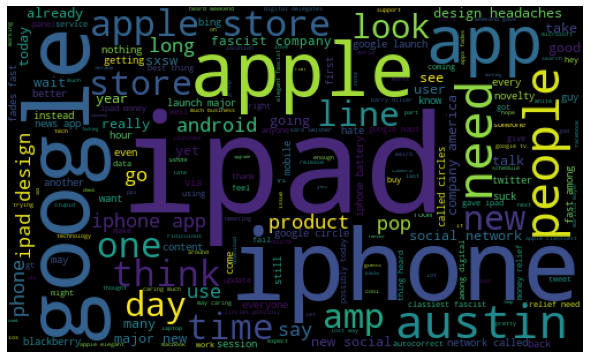

In [30]:
neg = df[df["Emotion"] == "Negative emotion"]
words = ' '.join([txt for txt in neg.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Word Map for Positive Tweets

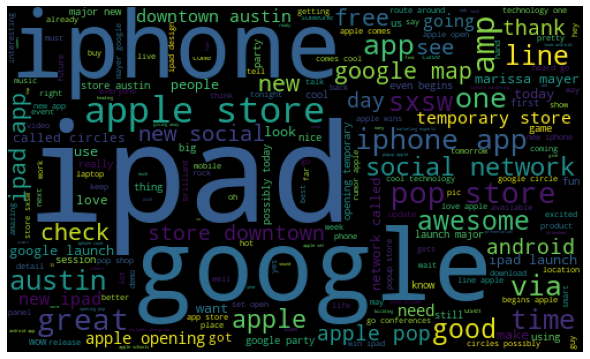

In [31]:
pos = df[df["Emotion"] == "Positive emotion"]
words = ' '.join([txt for txt in pos.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [26]:
X = df.Cleaned_Tweet
y = df.Emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, stratify = y)
#setting X to the tweet, Y to the emotion, running the first train test splot

In [23]:
df

,Emotion,Cleaned_Tweet
0,Negative emotion,iphone hrs tweeting dead need upgrade plugin s...
1,Positive emotion,know awesome ipad iphone app likely appreciate...
2,Positive emotion,wait also sale
3,Negative emotion,hope year festival crashy year iphone app
4,Positive emotion,great stuff fri marissa mayer google tim reill...
...,...,...
9088,Positive emotion,ipad everywhere
9089,No emotion toward brand or product,wave buzz interrupt regularly scheduled geek p...
9090,No emotion toward brand or product,google zeiger physician never reported potenti...
9091,No emotion toward brand or product,verizon iphone customers complained time fell ...


In [143]:
scaler = StandardScaler()
tokenizer = Tokenizer(num_words=300)
tokenizer.fit_on_texts(X_train)

X_train_tokens = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode='tfidf')
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_tokens.shape, X_train_transformed.shape
#transforming the data to fit with deep learning

((7595, 300), (7595, 300))

In [144]:
lb = LabelBinarizer()
lb.fit(y_train)

y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]
# turning "y" to categorical variables

In [145]:
y_train_lb.shape

(7595, 3)

In [146]:
model_1 = models.Sequential()
model_1.add(layers.Dense(50, activation = 'relu', input_shape = (300,)))
model_1.add(layers.Dense(100, activation = 'relu'))
model_1.add(layers.Dense(3, activation = 'softmax'))

model_1.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])
#first neural network trial

In [147]:
model_1_val = model_1.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
27/27 [==============================] - 1s 14ms/step - loss: 1.2969 - acc: 0.3634 - val_loss: 0.9648 - val_acc: 0.5237
Epoch 2/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9413 - acc: 0.5454 - val_loss: 0.9292 - val_acc: 0.5566
Epoch 3/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9301 - acc: 0.5595 - val_loss: 0.9097 - val_acc: 0.5684
Epoch 4/150
27/27 [==============================] - 0s 5ms/step - loss: 0.8899 - acc: 0.5687 - val_loss: 0.8962 - val_acc: 0.5803
Epoch 5/150
27/27 [==============================] - 0s 5ms/step - loss: 0.8916 - acc: 0.5797 - val_loss: 0.8856 - val_acc: 0.5947
Epoch 6/150
27/27 [==============================] - 0s 6ms/step - loss: 0.8773 - acc: 0.5886 - val_loss: 0.8767 - val_acc: 0.6000
Epoch 7/150
27/27 [==============================] - 0s 5ms/step - loss: 0.8526 - acc: 0.6060 - val_loss: 0.8684 - val_acc: 0.6013
Epoch 8/150
27/27 [==============================] - 0s 5ms/step - loss: 0.8709 - 

Epoch 125/150
27/27 [==============================] - 0s 5ms/step - loss: 0.5670 - acc: 0.7608 - val_loss: 0.7651 - val_acc: 0.6605
Epoch 126/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5801 - acc: 0.7499 - val_loss: 0.7661 - val_acc: 0.6579
Epoch 127/150
27/27 [==============================] - 0s 5ms/step - loss: 0.5789 - acc: 0.7528 - val_loss: 0.7665 - val_acc: 0.6605
Epoch 128/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5624 - acc: 0.7609 - val_loss: 0.7666 - val_acc: 0.6605
Epoch 129/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5558 - acc: 0.7669 - val_loss: 0.7673 - val_acc: 0.6605
Epoch 130/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5594 - acc: 0.7617 - val_loss: 0.7677 - val_acc: 0.6618
Epoch 131/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5655 - acc: 0.7642 - val_loss: 0.7683 - val_acc: 0.6605
Epoch 132/150
27/27 [==============================] - 0s 4ms/step - 

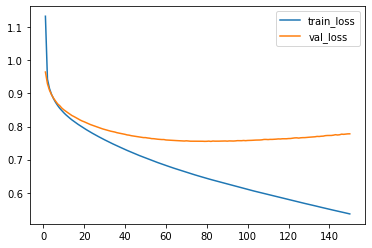

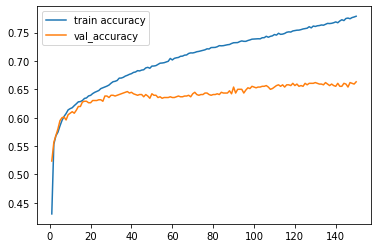

In [148]:
history = model_1_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_1_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()
#clear signs of overfitting, onto the next model

In [40]:
results = model_1.evaluate(X_train_transformed, y_train_lb)
print(f'Training Loss: {results[0]:.3} \nTraining Accuracy: {results[1]:.3}')
#training accuracy

238/238 [==============================] - 0s 1ms/step - loss: 0.5577 - acc: 0.7700
Training Loss: 0.558 
Training Accuracy: 0.77


In [41]:
results2 = model_1.evaluate(X_test_transformed, y_test_lb)
print(f'Testing Loss: {results2[0]:.3} \nTesting Accuracy: {results2[1]:.3}')
#testing accuracy

42/42 [==============================] - 0s 2ms/step - loss: 0.8077 - acc: 0.6510
Testing Loss: 0.808 
Testing Accuracy: 0.651


In [42]:
model_2 = models.Sequential()
model_2.add(layers.Dense(50, activation = 'relu', input_shape = (300,)))
model_2.add(Dropout(.2))
model_2.add(layers.Dense(100, activation = 'relu'))
model_2.add(Dropout(.2))
model_2.add(layers.Dense(3, activation = 'softmax'))

model_2.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])
# second iteration including dropout neurons

In [43]:
model_2_val = model_2.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
27/27 [==============================] - 1s 16ms/step - loss: 1.3418 - acc: 0.3068 - val_loss: 0.9517 - val_acc: 0.5829
Epoch 2/150
27/27 [==============================] - 0s 8ms/step - loss: 1.0147 - acc: 0.5252 - val_loss: 0.9036 - val_acc: 0.5987
Epoch 3/150
27/27 [==============================] - 0s 7ms/step - loss: 0.9713 - acc: 0.5558 - val_loss: 0.8844 - val_acc: 0.6105
Epoch 4/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9494 - acc: 0.5681 - val_loss: 0.8737 - val_acc: 0.6132
Epoch 5/150
27/27 [==============================] - 0s 8ms/step - loss: 0.9215 - acc: 0.5712 - val_loss: 0.8660 - val_acc: 0.6145
Epoch 6/150
27/27 [==============================] - 0s 7ms/step - loss: 0.9201 - acc: 0.5705 - val_loss: 0.8605 - val_acc: 0.6171
Epoch 7/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9051 - acc: 0.5795 - val_loss: 0.8556 - val_acc: 0.6237
Epoch 8/150
27/27 [==============================] - 0s 8ms/step - loss: 0.9026 - 

Epoch 125/150
27/27 [==============================] - 0s 8ms/step - loss: 0.7028 - acc: 0.6909 - val_loss: 0.7649 - val_acc: 0.6579
Epoch 126/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7119 - acc: 0.6857 - val_loss: 0.7647 - val_acc: 0.6592
Epoch 127/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7119 - acc: 0.6861 - val_loss: 0.7649 - val_acc: 0.6579
Epoch 128/150
27/27 [==============================] - 0s 5ms/step - loss: 0.6976 - acc: 0.6917 - val_loss: 0.7646 - val_acc: 0.6579
Epoch 129/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7001 - acc: 0.6822 - val_loss: 0.7647 - val_acc: 0.6592
Epoch 130/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7046 - acc: 0.6898 - val_loss: 0.7645 - val_acc: 0.6605
Epoch 131/150
27/27 [==============================] - 0s 9ms/step - loss: 0.7031 - acc: 0.6805 - val_loss: 0.7644 - val_acc: 0.6618
Epoch 132/150
27/27 [==============================] - 0s 5ms/step - 

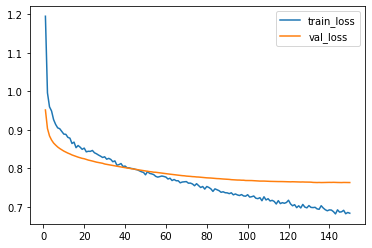

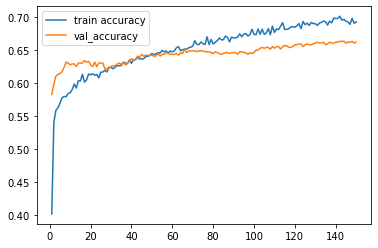

In [44]:
history = model_2_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_2_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()
# a little better

In [45]:
model_2.evaluate(X_test_transformed, y_test_lb)
#still not happy with the accuracy

42/42 [==============================] - 0s 1ms/step - loss: 0.7730 - acc: 0.6428


[0.773002564907074, 0.6428039073944092]

In [27]:
X = df.Cleaned_Tweet
y = df.Emotion
df_train, df_test = train_test_split(df, test_size = .15, stratify = df.Emotion)
X_test, y_test = df_test.Cleaned_Tweet, df_test.Emotion
X_test.shape
#changing the way X_train is formed

(1341,)

In [28]:
df_negative = df_train[df_train["Emotion"] == "Negative emotion"].sample(5388, replace = True)
df_positive = df_train[df_train["Emotion"] == "Positive emotion"].sample(5388, replace = True)
df_neutral = df[df["Emotion"] == "No emotion toward brand or product"]
#using upsampling to have equal amounts of each class

In [29]:
df_train = pd.concat([df_negative, df_positive, df_neutral], axis = 0)
df_train = df_train.sample(frac=1, axis=0).reset_index(drop=True)
df_train["Emotion"].value_counts()
#making sure training set has equal amounts of each class

No emotion toward brand or product    5388
Positive emotion                      5388
Negative emotion                      5388
Name: Emotion, dtype: int64

In [30]:
X_train, y_train = df_train.Cleaned_Tweet, df_train.Emotion


In [31]:
lem = WordNetLemmatizer()
def lem_tokenize(tweet):
    return [lem.lemmatize(x) for x in tweet.split()]
#to simplify the data even more, making use of the lemmatizer from nltk

In [32]:
vectorizer = TfidfVectorizer(max_features = 750, ngram_range = (1,2), tokenizer = (lem_tokenize))
X_train_tokens = vectorizer.fit_transform(X_train).todense()
X_test_tokens = vectorizer.transform(X_test).todense()
#increasing max features to 750 and using single and bi-grams

In [33]:
lb = LabelBinarizer()
lb.fit(y_train)
y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]
# changing y variable into categorical format

In [34]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_transformed.shape
#new X_train - a lot bigger 

(16164, 750)

In [158]:
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation = 'relu', input_shape = (750,)))
model_3.add(Dropout(.2))
model_3.add(layers.Dense(32, activation = 'relu'))
model_3.add(Dropout(.2))
model_3.add(layers.Dense(3, activation = 'softmax'))

model_3.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])
#third neural network attempt

In [181]:
model_3_val = model_3.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 1s 8ms/step - loss: 1.2119 - acc: 0.3501 - val_loss: 1.0958 - val_acc: 0.3976
Epoch 2/150
57/57 [==============================] - 0s 4ms/step - loss: 1.1518 - acc: 0.3620 - val_loss: 1.0622 - val_acc: 0.4317
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 1.1024 - acc: 0.3968 - val_loss: 1.0390 - val_acc: 0.4583
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0851 - acc: 0.4100 - val_loss: 1.0201 - val_acc: 0.4731
Epoch 5/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0596 - acc: 0.4303 - val_loss: 1.0041 - val_acc: 0.4960
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0449 - acc: 0.4459 - val_loss: 0.9900 - val_acc: 0.5127
Epoch 7/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0258 - acc: 0.4675 - val_loss: 0.9751 - val_acc: 0.5300
Epoch 8/150
57/57 [==============================] - 0s 4ms/step - loss: 1.0048 - a

Epoch 125/150
57/57 [==============================] - 0s 4ms/step - loss: 0.4167 - acc: 0.8171 - val_loss: 0.4064 - val_acc: 0.8250
Epoch 126/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4199 - acc: 0.8126 - val_loss: 0.4054 - val_acc: 0.8225
Epoch 127/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4228 - acc: 0.8047 - val_loss: 0.4040 - val_acc: 0.8250
Epoch 128/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4093 - acc: 0.8146 - val_loss: 0.4037 - val_acc: 0.8281
Epoch 129/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4101 - acc: 0.8198 - val_loss: 0.4023 - val_acc: 0.8256
Epoch 130/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4173 - acc: 0.8171 - val_loss: 0.4009 - val_acc: 0.8306
Epoch 131/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4168 - acc: 0.8200 - val_loss: 0.4012 - val_acc: 0.8293
Epoch 132/150
57/57 [==============================] - 0s 3ms/step - 

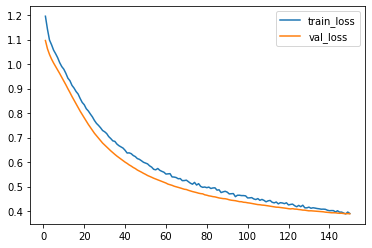

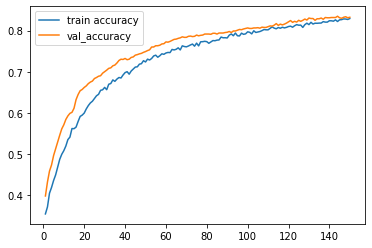

In [182]:
history = model_3_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_3_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()
#no signs of overfitting!

In [183]:
model_3.evaluate(X_test_transformed, y_test_lb)
#accuracy a little better, still not completely satisfied

42/42 [==============================] - 0s 1ms/step - loss: 0.8849 - acc: 0.7069


[0.8848961591720581, 0.7069351077079773]

In [184]:
confusion_matrix(y_train_lb.argmax(axis = 1), model_3.predict(X_train_transformed).argmax(axis = 1))
#confusion matrixx

array([[5319,   42,   27],
       [ 134, 4337,  917],
       [  40,  843, 4505]])

In [185]:
pred = model_3.predict(X_test_transformed).argmax(axis = 1)
y_test_labels = y_test_lb.argmax(axis = 1)
matrix = confusion_matrix(y_test_labels, pred)
matrix
#confusion matrix for test data

array([[ 34,  35,  16],
       [ 22, 657, 130],
       [ 21, 169, 257]])

In [159]:
model_4 = models.Sequential()
model_4.add(layers.Dense(16, activation = 'relu', input_shape = (750,)))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(32, activation = 'relu'))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(16, activation = 'relu'))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(3, activation = 'softmax'))

model_4.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])


model_4.compile(optimizer='Adam', 
                   loss='mse', 
                   metrics=['acc'])
#fourth neural network, making use of the Adam optimizer

In [228]:
model_4_val = model_4.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 1s 8ms/step - loss: 0.2382 - acc: 0.3544 - val_loss: 0.2008 - val_acc: 0.5003
Epoch 2/150
57/57 [==============================] - 0s 4ms/step - loss: 0.2046 - acc: 0.4691 - val_loss: 0.1717 - val_acc: 0.6246
Epoch 3/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1790 - acc: 0.5627 - val_loss: 0.1450 - val_acc: 0.6753
Epoch 4/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1559 - acc: 0.6308 - val_loss: 0.1276 - val_acc: 0.7025
Epoch 5/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1379 - acc: 0.6872 - val_loss: 0.1176 - val_acc: 0.7396
Epoch 6/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1244 - acc: 0.7172 - val_loss: 0.1102 - val_acc: 0.7532
Epoch 7/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1175 - acc: 0.7425 - val_loss: 0.1037 - val_acc: 0.7638
Epoch 8/150
57/57 [==============================] - 0s 6ms/step - loss: 0.1111 - a

57/57 [==============================] - 0s 5ms/step - loss: 0.0424 - acc: 0.9171 - val_loss: 0.0769 - val_acc: 0.8590
Epoch 125/150
57/57 [==============================] - 0s 6ms/step - loss: 0.0442 - acc: 0.9144 - val_loss: 0.0778 - val_acc: 0.8621
Epoch 126/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0450 - acc: 0.9139 - val_loss: 0.0794 - val_acc: 0.8596
Epoch 127/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0442 - acc: 0.9153 - val_loss: 0.0789 - val_acc: 0.8596
Epoch 128/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0441 - acc: 0.9152 - val_loss: 0.0779 - val_acc: 0.8565
Epoch 129/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0435 - acc: 0.9171 - val_loss: 0.0775 - val_acc: 0.8596
Epoch 130/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0435 - acc: 0.9183 - val_loss: 0.0748 - val_acc: 0.8658
Epoch 131/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0444 -

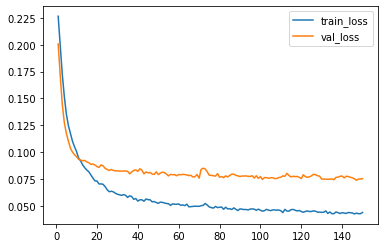

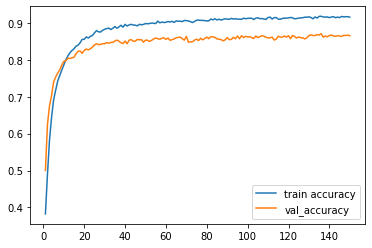

In [229]:
history = model_4_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_4_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()
#no crazy signs of overfitting

In [230]:
model_4.evaluate(X_test_transformed, y_test_lb, batch_size=128)
#highest accuracy yet

11/11 [==============================] - 0s 2ms/step - loss: 0.1570 - acc: 0.7353


[0.15696391463279724, 0.7352721691131592]

# CROSS VALIDATING 

In [160]:
X = df.Cleaned_Tweet
y = df.Emotion
df_train, df_test = train_test_split(df, test_size = .15, stratify = df.Emotion)
X_test, y_test = df_test.Cleaned_Tweet, df_test.Emotion
X_test.shape

(1341,)

In [161]:
df_negative = df_train[df_train["Emotion"] == "Negative emotion"].sample(5388, replace = True)
df_positive = df_train[df_train["Emotion"] == "Positive emotion"].sample(5388, replace = True)
df_neutral = df[df["Emotion"] == "No emotion toward brand or product"]

In [162]:
df_train = pd.concat([df_negative, df_positive, df_neutral], axis = 0)
df_train = df_train.sample(frac=1, axis=0).reset_index(drop=True)
df_train["Emotion"].value_counts()

Negative emotion                      5388
Positive emotion                      5388
No emotion toward brand or product    5388
Name: Emotion, dtype: int64

In [163]:
X_train, y_train = df_train.Cleaned_Tweet, df_train.Emotion

In [164]:
lem = WordNetLemmatizer()
def lem_tokenize(tweet):
    return [lem.lemmatize(x) for x in tweet.split()]

In [165]:
vectorizer = TfidfVectorizer(max_features = 750, ngram_range = (1,2), tokenizer = (lem_tokenize))
X_train_tokens = vectorizer.fit_transform(X_train).todense()
X_test_tokens = vectorizer.transform(X_test).todense()

In [166]:
lb = LabelBinarizer()
lb.fit(y_train)
y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

In [167]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_transformed.shape

(16164, 750)

In [168]:
model_4_val = model_4.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 1s 9ms/step - loss: 0.2359 - acc: 0.3561 - val_loss: 0.1939 - val_acc: 0.5349
Epoch 2/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1994 - acc: 0.4918 - val_loss: 0.1626 - val_acc: 0.6265
Epoch 3/150
57/57 [==============================] - 0s 7ms/step - loss: 0.1699 - acc: 0.5961 - val_loss: 0.1398 - val_acc: 0.6729
Epoch 4/150
57/57 [==============================] - 0s 6ms/step - loss: 0.1521 - acc: 0.6400 - val_loss: 0.1249 - val_acc: 0.7186
Epoch 5/150
57/57 [==============================] - 0s 6ms/step - loss: 0.1322 - acc: 0.7019 - val_loss: 0.1140 - val_acc: 0.7477
Epoch 6/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1201 - acc: 0.7337 - val_loss: 0.1077 - val_acc: 0.7619
Epoch 7/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1086 - acc: 0.7698 - val_loss: 0.1016 - val_acc: 0.7805
Epoch 8/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1035 - a

Epoch 125/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0419 - acc: 0.9208 - val_loss: 0.0675 - val_acc: 0.8825
Epoch 126/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0441 - acc: 0.9179 - val_loss: 0.0673 - val_acc: 0.8831
Epoch 127/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0431 - acc: 0.9210 - val_loss: 0.0670 - val_acc: 0.8794
Epoch 128/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0455 - acc: 0.9168 - val_loss: 0.0657 - val_acc: 0.8881
Epoch 129/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0452 - acc: 0.9161 - val_loss: 0.0689 - val_acc: 0.8788
Epoch 130/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0445 - acc: 0.9162 - val_loss: 0.0684 - val_acc: 0.8776
Epoch 131/150
57/57 [==============================] - 0s 6ms/step - loss: 0.0433 - acc: 0.9185 - val_loss: 0.0681 - val_acc: 0.8813
Epoch 132/150
57/57 [==============================] - 0s 6ms/step - 

In [169]:
model_4.evaluate(X_test_transformed, y_test_lb, batch_size=128)
#similar accuracy

11/11 [==============================] - 0s 3ms/step - loss: 0.1592 - acc: 0.7323


[0.1592448204755783, 0.7322893142700195]

# CROSS VALIDATING

In [37]:
df_train

,Emotion,Cleaned_Tweet
0,No emotion toward brand or product,wish amp would make whispergram hollergram iph...
1,No emotion toward brand or product,today sessions print design future mom ipad
2,Negative emotion,classiest fascist company existence kara swisher
3,Positive emotion,begins story cool sxsw app also apple launchin...
4,No emotion toward brand or product,entrepreneurs win tech award via
...,...,...
16159,Negative emotion,tried installing iphone crashes every time open
16160,Positive emotion,talked great developers android meetup looking...
16161,Positive emotion,apple opens store smart well played fruit co via
16162,Negative emotion,make sense limit content specific platform ipa...


In [170]:
X = df.Cleaned_Tweet
y = df.Emotion
df_train, df_test = train_test_split(df, test_size = .15, stratify = df.Emotion)
X_test, y_test = df_test.Cleaned_Tweet, df_test.Emotion
X_test.shape

(1341,)

In [171]:
df_negative = df_train[df_train["Emotion"] == "Negative emotion"].sample(5388, replace = True)
df_positive = df_train[df_train["Emotion"] == "Positive emotion"].sample(5388, replace = True)
df_neutral = df[df["Emotion"] == "No emotion toward brand or product"]

In [172]:
df_train = pd.concat([df_negative, df_positive, df_neutral], axis = 0)
df_train = df_train.sample(frac=1, axis=0).reset_index(drop=True)
df_train["Emotion"].value_counts()

Negative emotion                      5388
Positive emotion                      5388
No emotion toward brand or product    5388
Name: Emotion, dtype: int64

In [173]:
X_train, y_train = df_train.Cleaned_Tweet, df_train.Emotion

In [174]:
lem = WordNetLemmatizer()
def lem_tokenize(tweet):
    return [lem.lemmatize(x) for x in tweet.split()]

In [252]:
vectorizer = TfidfVectorizer(max_features = 750, ngram_range = (1,2), tokenizer = (lem_tokenize))
X_train_tokens = vectorizer.fit_transform(X_train).todense()
X_test_tokens = vectorizer.transform(X_test).todense()

In [253]:
lb = LabelBinarizer()
lb.fit(y_train)
y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

In [254]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_transformed.shape

(16164, 750)

In [178]:
model_4_val = model_4.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 0s 5ms/step - loss: 0.3330 - acc: 0.4072 - val_loss: 0.2766 - val_acc: 0.4267
Epoch 2/150
57/57 [==============================] - 0s 4ms/step - loss: 0.2419 - acc: 0.4630 - val_loss: 0.2129 - val_acc: 0.4756
Epoch 3/150
57/57 [==============================] - 0s 4ms/step - loss: 0.2070 - acc: 0.5031 - val_loss: 0.1923 - val_acc: 0.5380
Epoch 4/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1920 - acc: 0.5418 - val_loss: 0.1779 - val_acc: 0.5863
Epoch 5/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1818 - acc: 0.5682 - val_loss: 0.1677 - val_acc: 0.6067
Epoch 6/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1725 - acc: 0.5967 - val_loss: 0.1576 - val_acc: 0.6252
Epoch 7/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1636 - acc: 0.6238 - val_loss: 0.1475 - val_acc: 0.6456
Epoch 8/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1553 - a

Epoch 125/150
57/57 [==============================] - 0s 3ms/step - loss: 0.0567 - acc: 0.8917 - val_loss: 0.0798 - val_acc: 0.8485
Epoch 126/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0565 - acc: 0.8939 - val_loss: 0.0790 - val_acc: 0.8497
Epoch 127/150
57/57 [==============================] - 0s 6ms/step - loss: 0.0560 - acc: 0.8948 - val_loss: 0.0797 - val_acc: 0.8510
Epoch 128/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0552 - acc: 0.8959 - val_loss: 0.0788 - val_acc: 0.8510
Epoch 129/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0550 - acc: 0.8956 - val_loss: 0.0797 - val_acc: 0.8485
Epoch 130/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0576 - acc: 0.8902 - val_loss: 0.0792 - val_acc: 0.8460
Epoch 131/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0568 - acc: 0.8946 - val_loss: 0.0804 - val_acc: 0.8472
Epoch 132/150
57/57 [==============================] - 0s 4ms/step - 

In [179]:
model_4.evaluate(X_test_transformed, y_test_lb, batch_size=128)
#highest accuracy score yet

11/11 [==============================] - 0s 2ms/step - loss: 0.1447 - acc: 0.7435


[0.1447392702102661, 0.7434750199317932]

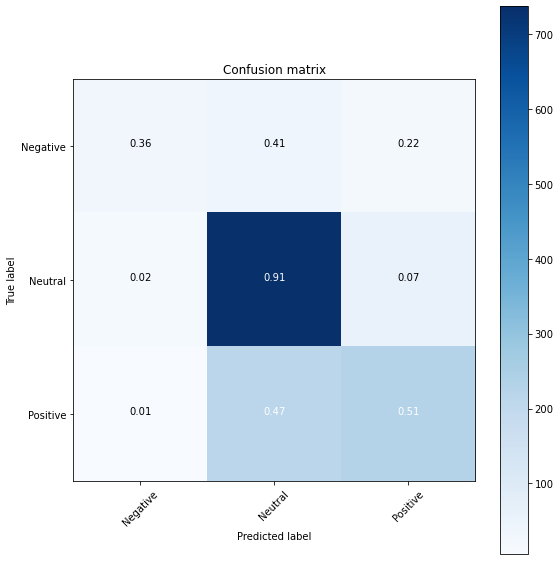

In [273]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(matrix, ["Negative", "Neutral", "Positive"])

#creating a prettier confusion matrix using a function already premade on the sklearn website

In [182]:
pred = model_4.predict(X_test_transformed).argmax(axis = 1)
y_test_labels = y_test_lb.argmax(axis = 1)
matrix = confusion_matrix(y_test_labels, pred)
matrix
#less pretty confusion matrix

array([[ 31,  35,  19],
       [ 16, 737,  56],
       [  6, 212, 229]])

In [68]:
pred = model_4.predict(X_test_transformed)
pred[model_4.predict(X_test_transformed).argmax(axis = 1)==0]
pred_df = pd.DataFrame(X_test)
pred_df["Negative"] = 0
pred_df["Neutral"] = 0
pred_df["Positive"] = 0
pred_df[["Negative", "Neutral", "Positive"]] = pred
pred_df["Label"] = y_test
pred_df
# checking the backbone of the neural network/how it is making predictions

,Cleaned_Tweet,Negative,Neutral,Positive,Label
1131,anyone show iphone charger need tweet jokes be...,2.219859e-11,1.000000,3.020135e-21,No emotion toward brand or product
3574,anti social irl typing ipad social tv session ...,8.462668e-23,0.992573,7.427268e-03,No emotion toward brand or product
1432,toptweets rumor apple opening temporary store ...,2.529701e-07,0.811959,1.880405e-01,No emotion toward brand or product
2310,awkward jc penneys question asked marissa maye...,9.296409e-25,1.000000,1.156578e-15,No emotion toward brand or product
5141,new ipad apps speech therapy communication sho...,8.593644e-05,0.533523,4.663908e-01,No emotion toward brand or product
...,...,...,...,...,...
3036,mistakes made building netflix iphone sxsw,9.274502e-05,0.997719,2.188190e-03,No emotion toward brand or product
55,talking google effort allow users open systems,4.268953e-18,1.000000,1.189560e-08,Positive emotion
1072,current screen browser upload application,8.512523e-12,0.975335,2.466536e-02,No emotion toward brand or product
3194,friend told talking smart bikes check google p...,5.758184e-14,0.999998,2.038201e-06,No emotion toward brand or product


In [70]:
pred_df[(pred_df["Negative"] > .2) & (pred_df["Label"] != "Negative emotion")]
#checking the errors associated with negative emotion

,Cleaned_Tweet,Negative,Neutral,Positive,Label
6516,best thing heard weekend gave ipad money relie...,1.000000,1.310807e-27,0.000000e+00,No emotion toward brand or product
1613,new app store includes uberguide,0.390354,4.454145e-01,1.642320e-01,No emotion toward brand or product
2854,already seeing heavy ipad presence,0.400241,5.993559e-01,4.035910e-04,Positive emotion
3234,loving apple pop downtown office long last us ...,0.968841,1.158053e-02,1.957862e-02,Positive emotion
6518,best thing heard weekend gave ipad money relie...,1.000000,1.310807e-27,0.000000e+00,No emotion toward brand or product
5541,bad news update pop apple store ipads sure tom...,0.983071,1.692875e-02,1.472538e-13,No emotion toward brand or product
2184,iphone paul reubens,0.648009,3.074586e-01,4.453250e-02,No emotion toward brand or product
8249,ad jg buat iphone new app store includes uberg...,0.548064,2.527302e-01,1.992055e-01,No emotion toward brand or product
8206,hmmm bit weird tending google circle,0.505365,4.946353e-01,0.000000e+00,No emotion toward brand or product
7767,awesome best thing heard wknd gave ipad money ...,1.000000,4.305124e-12,0.000000e+00,No emotion toward brand or product


# WORD VECTORS

In [282]:
nlp = spacy.load("en_core_web_md")
#using spacy library to encorporate word vectors

In [289]:
cleaned = [nlp(x) for x in X_train]
#prepping data

In [290]:
train_x_vectors = [x.vector for x in cleaned]
#prepping data

In [291]:
len(train_x_vectors[1])

300

In [292]:
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x_vectors, y_train)
#using svm to make predictions

SVC(kernel='linear')

In [293]:
test = [nlp(x) for x in X_test]
cleaned_x = [x.vector for x in test]
#prepping test data

In [294]:
clf.score(cleaned_x, y_test)
#not a crazy good score

0.6659209545115585

In [311]:
test = ["I love to code in python"]
test_doc = [nlp(x) for x in test]
vec = [x.vector for x in test_doc]

clf.predict(vec)
#testing out 

array(['No emotion toward brand or product'], dtype=object)

In [306]:
test_doc2 = [nlp(x) for x in X_test]
vec2 = [x.vector for x in test_doc2]
preds = clf.predict(vec2)


In [310]:
accuracy_score(y_test, preds)

0.6659209545115585

# RANDOM FOREST

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)
#importing necessary library and using an out of the box random forest on our training data

RandomForestClassifier()

In [40]:
rf.score(X_test_transformed, y_test)

0.7464578672632364

In [273]:
forest = RandomForestClassifier()
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3 ,6]
}

rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_transformed, y_train)
rf_grid_search.best_params_
#gridsearch cv to find best parameters

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [138]:
forest = RandomForestClassifier(criterion = 'entropy',
  max_depth = None,
  min_samples_leaf = 1,
  min_samples_split = 2)
forest.fit(X_train_transformed, y_train)
#using best parameters 

RandomForestClassifier(criterion='entropy')

In [141]:
forest.score(X_test_transformed, y_test)

0.7285607755406414

# SVM

In [268]:
clf = svm.SVC(kernel = "linear")
clf.fit(X_train_tokens, y_train)
#using svm without spacy

SVC(kernel='linear')

In [269]:
preds = clf.predict(X_test_tokens)
#predicitons

In [270]:
accuracy_score(y_test, preds)
#accuracy score not too great

0.6256524981357197

# TEXTBLOB

In [139]:
y_test.value_counts()

No emotion toward brand or product    809
Positive emotion                      447
Negative emotion                       85
Name: Emotion, dtype: int64

In [66]:
TextBlob("Python is great").sentiment.polarity
#test

0.8

In [267]:
rf_grid_search.best_score_, rf_grid_search.best_params_

(0.8835684236575104,
 {'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [112]:
df["Polarity"] = df["Cleaned_Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["prediction"] = df["Polarity"].apply(lambda x: "Negative emotion" if x <= -.25 else "Positive emotion"\
                            if x >= .25 else "No emotion toward brand or product")
#creating polarity and prediction columns based on above conditions

In [113]:
df

,Emotion,Cleaned_Tweet,Polarity,prediction,accuracy
0,Negative emotion,iphone hrs tweeting dead need upgrade plugin s...,-0.200000,No emotion toward brand or product,1
1,Positive emotion,know awesome ipad iphone app likely appreciate...,0.466667,Positive emotion,1
2,Positive emotion,wait also sale,0.000000,No emotion toward brand or product,0
3,Negative emotion,hope year festival crashy year iphone app,0.000000,No emotion toward brand or product,0
4,Positive emotion,great stuff fri marissa mayer google tim reill...,0.800000,Positive emotion,1
...,...,...,...,...,...
9088,Positive emotion,ipad everywhere link,0.000000,No emotion toward brand or product,0
9089,No emotion toward brand or product,wave buzz interrupt regularly scheduled geek p...,0.000000,No emotion toward brand or product,1
9090,No emotion toward brand or product,google zeiger physician never reported potenti...,0.000000,No emotion toward brand or product,1
9091,No emotion toward brand or product,verizon iphone customers complained time fell ...,-0.054545,No emotion toward brand or product,1


In [114]:
df["accuracy"] = df.apply(lambda x: 1 if x["Emotion"] == x["prediction"] else 0, axis = 1)
#accuracy is equal to 1 if prediction is equal to assigned emotion

In [115]:
df[(df["accuracy"] == 1) & (df["prediction"] == "Negative emotion")]
#checking negative emotion performance

,Emotion,Cleaned_Tweet,Polarity,prediction,accuracy
38,Negative emotion,false alarm google circles coming nowand proba...,-0.4000,Negative emotion,1
64,Negative emotion,line apple store insane,-1.0000,Negative emotion,1
233,Negative emotion,iphone alarms botch timechange many ers freak ...,-0.2500,Negative emotion,1
236,Negative emotion,meant also wish stupid iphone,-0.8000,Negative emotion,1
291,Negative emotion,quot apple store mall sunday crowded line fake...,-0.5500,Negative emotion,1
...,...,...,...,...,...
8057,Negative emotion,every person see ipad looks crazy looks like c...,-0.6000,Negative emotion,1
8387,Negative emotion,iphone anyway remove burn hashtags eg bored al...,-0.5000,Negative emotion,1
8712,Negative emotion,google patented something age domain rankings ...,-0.3125,Negative emotion,1
8981,Negative emotion,think effing hubby line someone point towards ...,-0.5000,Negative emotion,1


In [116]:
sum(df.accuracy)/len(df)
#overall accuracy using textblob

0.6012757385854969

# Recommendations/Future Research

## With accuracy as the number one goal in this project, using the model_4 neural network or a random forest model is the best strategy

## If we were researching the sentiment of comments in a youtube comment section, there might be an increased importance on guessing negative comments correctly, and this might be traded for some overall accuracy

## More Tweets with higher numbers of negative tweets! The model's overall accuracy for negative tweets suffered due to the sheer lack of negative tweets


